In [8]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import os

In [9]:
os.chdir('/home/saumya/Documents/Spec_data/SNR/')

In [10]:
df1 = pd.read_csv('noise.csv')

In [11]:
df2 = pd.read_csv('Flame_spectrum_1343.csv')

In [12]:
df1

,7443.92466534225,0.000875223655881897
0,7443.924728,0.000840
1,7443.924791,0.000581
2,7443.924855,0.000156
3,7443.924918,0.000261
4,7443.924981,0.000283
...,...,...
944,7444.007531,-0.000099
945,7444.007640,-0.000455
946,7444.007749,-0.000630
947,7444.007859,-0.000389


In [13]:
df2

,7443.92466534225,0.000875223655881897
0,7443.924728,0.000840
1,7443.924791,0.000581
2,7443.924855,0.000156
3,7443.924918,0.000261
4,7443.924981,0.000283
...,...,...
7495,7445.034541,-0.000035
7496,7445.034701,-0.000838
7497,7445.034860,-0.000085
7498,7445.035019,-0.000519


In [30]:
a = df2['0.000875223655881897'].to_numpy()
b = df1['0.000875223655881897'].to_numpy()


In [31]:
a

array([ 8.39983614e-04,  5.81472644e-04,  1.56398942e-04, ...,
       -8.49359394e-05, -5.18721951e-04, -5.72973187e-04])

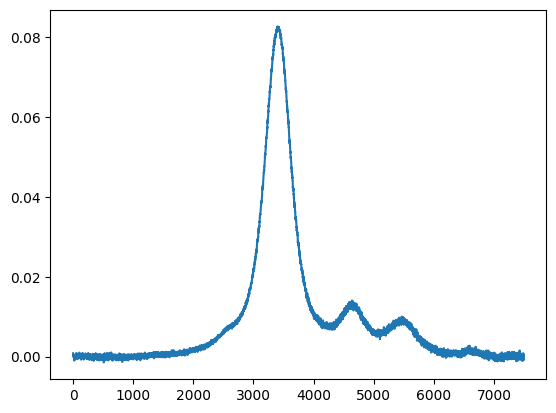

In [32]:
plt.plot(a)

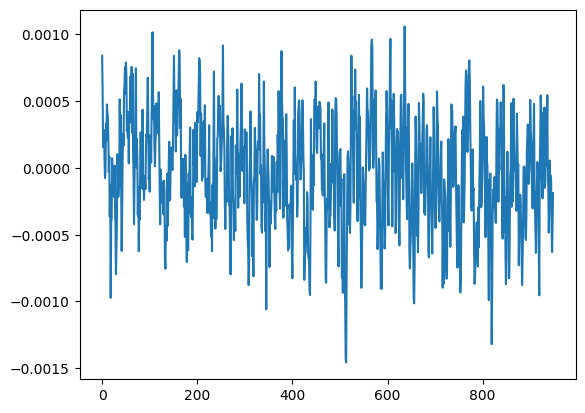

In [33]:
plt.plot(b)

In [45]:
from scipy.stats import norm
import scipy.signal as sig
import copy
import math

In [46]:
def signalPower(x):
    return np.average(x**2)

In [47]:
def SNR(signal, noise):
    powS = signalPower(signal)
    powN = signalPower(noise)
    return 10*math.log((powS-powN)/powN, 10)

In [48]:
method1 = SNR(a,b)
print("Result Method 1: {} dB".format(method1))

Result Method 1: 33.55055185534208 dB


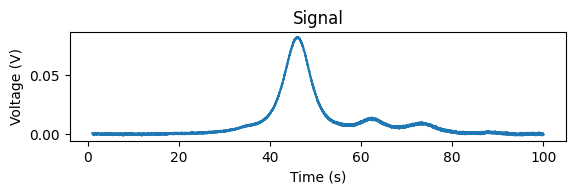

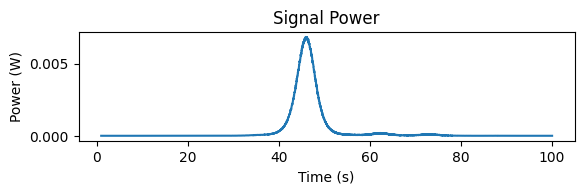

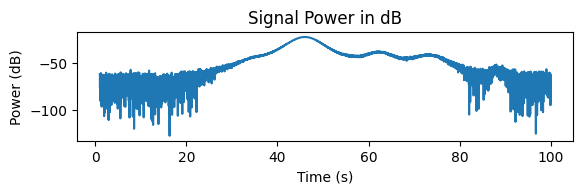

In [56]:

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 7500)
x_volts = a
plt.subplot(3,1,1)
plt.plot(t, x_volts)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

x_watts = x_volts ** 2
plt.subplot(3,1,2)
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

x_db = 10 * np.log10(x_watts)
plt.subplot(3,1,3)
plt.plot(t, x_db)
plt.title('Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

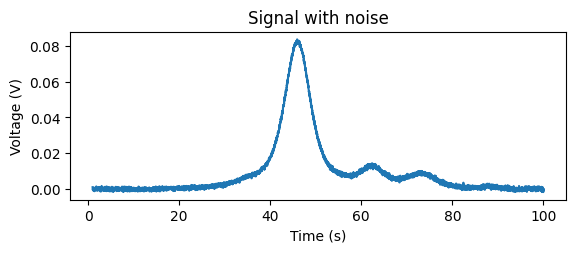

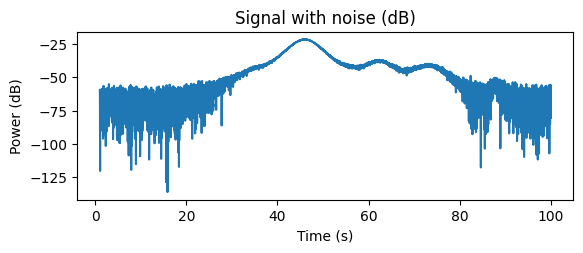

In [57]:
# Adding noise using target SNR

# Set a target SNR
target_snr_db = method1
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
plt.subplot(2,1,1)
plt.plot(t, y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
# Plot in dB
y_watts = y_volts ** 2
y_db = 10 * np.log10(y_watts)
plt.subplot(2,1,2)
plt.plot(t, 10* np.log10(y_volts**2))
plt.title('Signal with noise (dB)')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()